In [1]:
import random
from PIL import Image, ImageDraw
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import torch
import torchvision
from torchvision import transforms as T
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor


C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [3]:
device

device(type='cpu')

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import random
from random import randint, randrange
import pandas as pd
import cv2


In [5]:
mymodel = torch.load('C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/mymodel.pth',  map_location=torch.device('cpu'))

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [22/Jul/2023 09:37:17] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 09:37:18] "GET /static/css/main.css HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 09:37:18] "GET /static/images/favicon.png HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 09:37:18] "GET /static/images/favicon.png HTTP/1.1" 304 -
127.0.0.1 - - [22/Jul/2023 09:37:56] "POST / HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 09:37:56] "GET /static/css/main.css HTTP/1.1" 304 -
127.0.0.1 - - [22/Jul/2023 09:37:56] "GET /static/images/favicon.png HTTP/1.1" 304 -
127.0.0.1 - - [22/Jul/2023 09:37:56] "GET /static/images/test.jpg HTTP/1.1" 200 -
127.0.0.1 - - [22/Jul/2023 09:37:56] "GET /static/pred/predict.jpg HTTP/1.1" 200 -


99.22022819519043
97.26619124412537


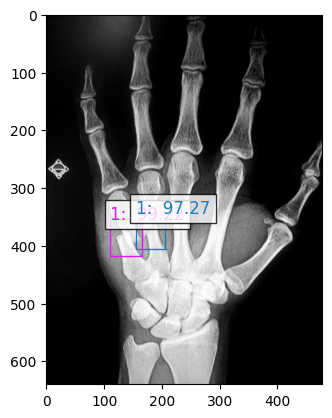

In [6]:
import json
import pickle

from flask import Flask,request,app,jsonify,render_template,url_for
import numpy as np
import pandas as pd

app = Flask(__name__)

@app.route('/')
def home():
    return render_template('index.html')
#     return render_template('home.html')

@app.route('/',methods=['POST'])
def predicting():
    imagefile = request.files['image']
    image_path = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/images/' + "test.jpg" 
    imagefile.save(image_path)
    
    
    
    path = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/images/test.jpg'
    img = Image.open(path)
    img1 = cv2.imread(path)

    # Preprocess the image
    img = T.ToTensor()(img)
    # print(img)
    img = img.to(device)
    # print(img)
    # Make a prediction
    mymodel.eval()
    with torch.no_grad():
        output = mymodel([img])

    # Extract the predicted boxes, labels and scores from the output
    pred_boxes = output[0]['boxes'].detach().cpu().numpy()
    pred_labels = output[0]['labels'].detach().cpu().numpy()
    pred_scores = output[0]['scores'].detach().cpu().numpy()

    # Display the image and the predicted boxes
    img = F.to_pil_image(img.cpu())
    plt.imshow(img)
    l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
    ax = plt.gca()
    for i in range(len(pred_boxes)):
        if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
            box = pred_boxes[i]
            label = pred_labels[i]
            score = pred_scores[i]
            color = np.random.rand(3)
            c = randint(0, 2)
            font = cv2.FONT_HERSHEY_SIMPLEX
            score = score * 100
            s = str(label) + ":" + "{:.2f}".format(score)
            # print(box)
            b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
            # print(c)
            # print(l[c])
            cv2.rectangle( img1 , ( b1, b2 ), ( b3 , b4), l[c], 1)

            cv2.putText(img1, s , (b1 , b2- 7), font, 0.7, l[c] , 2)
            ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))

            print(score)
            ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
#     plt.show()
    filename = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/pred/predict.jpg'
    cv2.imwrite(filename, img1)
#     cv2.imshow("Result", img1)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
#     plt.axis("off")
    if 1:
        
#         plt.savefig('C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/pred/predict.jpg', transparent=True)
        filename = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/pred/predict.jpg'
        return render_template('index.html', prediction =  1, org_img_path = 'static/images/test.jpg', pred_img_path = 'static/pred/predict.jpg')


app.run()


83.61809253692627


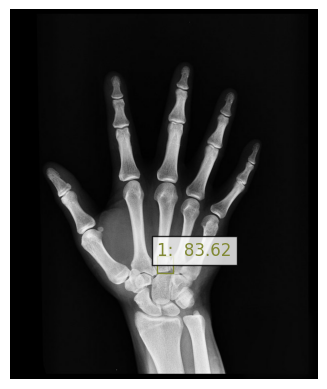

In [33]:
path = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/images/test.jpg'
img = Image.open(path)
img1 = cv2.imread(path)

# Preprocess the image
img = T.ToTensor()(img)
# img = img.unsqueeze(0) 
# print(img)
img = img.to(device)
# print(img)
# Make a prediction
mymodel.eval()
with torch.no_grad():
    output = mymodel([img])

# Extract the predicted boxes, labels and scores from the output
pred_boxes = output[0]['boxes'].detach().cpu().numpy()
pred_labels = output[0]['labels'].detach().cpu().numpy()
pred_scores = output[0]['scores'].detach().cpu().numpy()

# Display the image and the predicted boxes
img = F.to_pil_image(img.cpu())
plt.imshow(img)
l = [ (255,0,0), (0, 255 , 0), ( 0 , 0, 255)]
ax = plt.gca()
for i in range(len(pred_boxes)):
    if pred_scores[i] > 0.5:  # Only display boxes with confidence > 0.5
        box = pred_boxes[i]
        label = pred_labels[i]
        score = pred_scores[i]
        color = np.random.rand(3)
        c = randint(0, 2)
        font = cv2.FONT_HERSHEY_SIMPLEX
        score = score * 100
        s = str(label) + ":" + "{:.2f}".format(score)
        # print(box)
        b1, b2, b3, b4 = int(box[0]), int(box[1]), int(box[2]), int(box[3]),
        # print(c)
        # print(l[c])
        cv2.rectangle( img1 , ( b1, b2 ), ( b3 , b4), l[c], 1)

        cv2.putText(img1, s , (b1 , b2- 7), font, 0.7, l[c] , 1)
        ax.add_patch(plt.Rectangle((box[0], box[1]), box[2]-box[0], box[3]-box[1], fill=False, edgecolor=color, linewidth=1))

        print(score)
        ax.text(box[0], box[1], f'{label}: {score: .2f}', color=color, fontsize=12, bbox=dict(facecolor='white', alpha=0.8))
# plt.show()
plt.axis("off")
filename = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/pred/predict.jpg'
plt.savefig('C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/static/pred/predict.jpg')
filename = 'C:/Users/HP/OneDrive/Desktop/folder/Bone_fracture/pred/predict.jpg'
# cv2.imwrite(filename, img1)
#     cv2.imshow("Result", img1)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()

